In [4]:
import pandas as pd
from linearmodels.panel import PanelOLS, RandomEffects
from linearmodels.panel import compare
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def plot_country_graph(data):
    # Agrupando os dados por país e data, e somando os novos casos
    data_grouped = data.groupby(['Country', 'Date_reported'])['New_deaths'].sum().reset_index()
        
    # Ordenando os dados por país e data
    data_grouped_sorted = data_grouped.sort_values(by=['Country', 'Date_reported'])
    
    # Gerando as cores para cada país
    colors = plt.cm.jet(np.linspace(0, 1, len(data_grouped_sorted['Country'].unique())))
    
    # Plotando o gráfico
    plt.figure(figsize=(15, 10))
    
    for (country, color) in zip(data_grouped_sorted['Country'].unique(), colors):
        country_data = data_grouped_sorted[data_grouped_sorted['Country'] == country]
        plt.plot(country_data['Date_reported'], country_data['New_deaths'], color=color, linewidth=2)
    
    plt.xlabel('Data')
    plt.ylabel('Novas Mortes')
    plt.title('Mortes por COVID-19 ao longo do tempo por país')
    
    plt.show()

In [15]:
data = pd.read_csv('./Full_Northern_Countries.csv', encoding="utf-8")
# ==== Teste com Reuino Unido e Espanha ============================
# data = data[data['Country'].isin(['The United Kingdom', 'Spain'])]

# ============ Remoção da Namibia por ser um outlier gigantesco ===========
data = data[data['Country'] != 'China']


data['New_deaths'] = pd.to_numeric(data['New_deaths'], errors='coerce')

# ===== Usando somente dados positivos =============
# data = data[data['New_deaths'] > 0]

data['Date_reported'] = pd.to_datetime(data['Date_reported'])
data = data.set_index(['Country_code', 'Date_reported'])


# ========== Tratando os dados =================================
data['Population'] = data['Population'].str.replace(',', '', regex=False)
data['Population'] = pd.to_numeric(data['Population'], errors='coerce')


# ================= Fazendo a média móvel ==================
data['New_deaths'] = data['New_deaths'].rolling(window=7).mean()

# ================ Fazendo a coluna New_deaths ser relativa a população do país ============
data['Relative_New_deaths'] =  data['New_deaths'] / data['Population']
data['New_deaths']   = data['Relative_New_deaths']


# =========== Tratando os dados da coluna "Physicians per thousand" =========================
# data['Physicians per thousand'] = pd.to_numeric(data['Physicians per thousand'], errors='coerce')
data.rename(columns={'Physicians per thousand': 'Physicians_per_thousand'}, inplace=True)

# ========== Zerando valores negativos na coluna 'New_deaths' ===================
# data.loc[data['New_deaths'] < 0, 'New_deaths'] = 0
# data_no_zeros  = data[data['New_deaths'] > 0]
# New_deaths = data_no_zeros['New_deaths'].mean()
# data['New_deaths'] = data['New_deaths'].replace(0, New_deaths)



# ============= Aplicando a normalização min-max à colunas desejadas =================
scaler = MinMaxScaler()
data['New_deaths'] = scaler.fit_transform(data[['New_deaths']])
# data['Population'] = scaler.fit_transform(data[['Population']])
# data['Urban_population'] = scaler.fit_transform(data[['Urban_population']])


data

Country WHO_region  New_cases  \
Country_code Date_reported                                      
AF           2020-01-03     Afghanistan       EMRO          0   
             2020-01-04     Afghanistan       EMRO          0   
             2020-01-05     Afghanistan       EMRO          0   
             2020-01-06     Afghanistan       EMRO          0   
             2020-01-07     Afghanistan       EMRO          0   
...                                 ...        ...        ...   
YE           2023-09-23           Yemen       EMRO          0   
             2023-09-24           Yemen       EMRO          0   
             2023-09-25           Yemen       EMRO          0   
             2023-09-26           Yemen       EMRO          0   
             2023-09-27           Yemen       EMRO          0   

                            Cumulative_cases  New_deaths  Cumulative_deaths  \
Country_code Date_reported                                                    
AF           2020-01-03                    0    0.026219                  0   
             2020-01-04                    0    0.026219                  0   
             2020-01-05                    0    0.026219                  0   
             2020-01-06                    0    0.026219                  0   
             2020-01-07                    0    0.026219                  0   
...                                      ...         ...                ...   
YE           2023-09-23                11945    0.026219               2159   
             2023-09-24                11945    0.026219               2159   
             2023-09-25                11945    0.026219               2159   
             2023-09-26                11945    0.026219               2159   
             2023-09-27                11945    0.026219               2159   

                            season Abbreviation  Population Urban_population  \
Country_code Date_reported                                                     
AF           2020-01-03     winter           AF    38041754        9,797,273   
             2020-01-04     winter           AF    38041754        9,797,273   
             2020-01-05     winter           AF    38041754        9,797,273   
             2020-01-06     winter           AF    38041754        9,797,273   
             2020-01-07     winter           AF    38041754        9,797,273   
...                            ...          ...         ...              ...   
YE           2023-09-23     autumn           YE    29161922       10,869,523   
             2023-09-24     autumn           YE    29161922       10,869,523   
             2023-09-25     autumn           YE    29161922       10,869,523   
             2023-09-26     autumn           YE    29161922       10,869,523   
             2023-09-27     autumn           YE    29161922       10,869,523   

                            Physicians_per_thousand  Relative_New_deaths  
Country_code Date_reported                                                
AF           2020-01-03                        0.28                  NaN  
             2020-01-04                        0.28                  NaN  
             2020-01-05                        0.28                  NaN  
             2020-01-06                        0.28                  NaN  
             2020-01-07                        0.28                  NaN  
...                                             ...                  ...  
YE           2023-09-23                        0.31                  0.0  
             2023-09-24                        0.31                  0.0  
             2023-09-25                        0.31                  0.0  
             2023-09-26                        0.31                  0.0  
             2023-09-27                        0.31                  0.0  

[201872 rows x 12 columns]

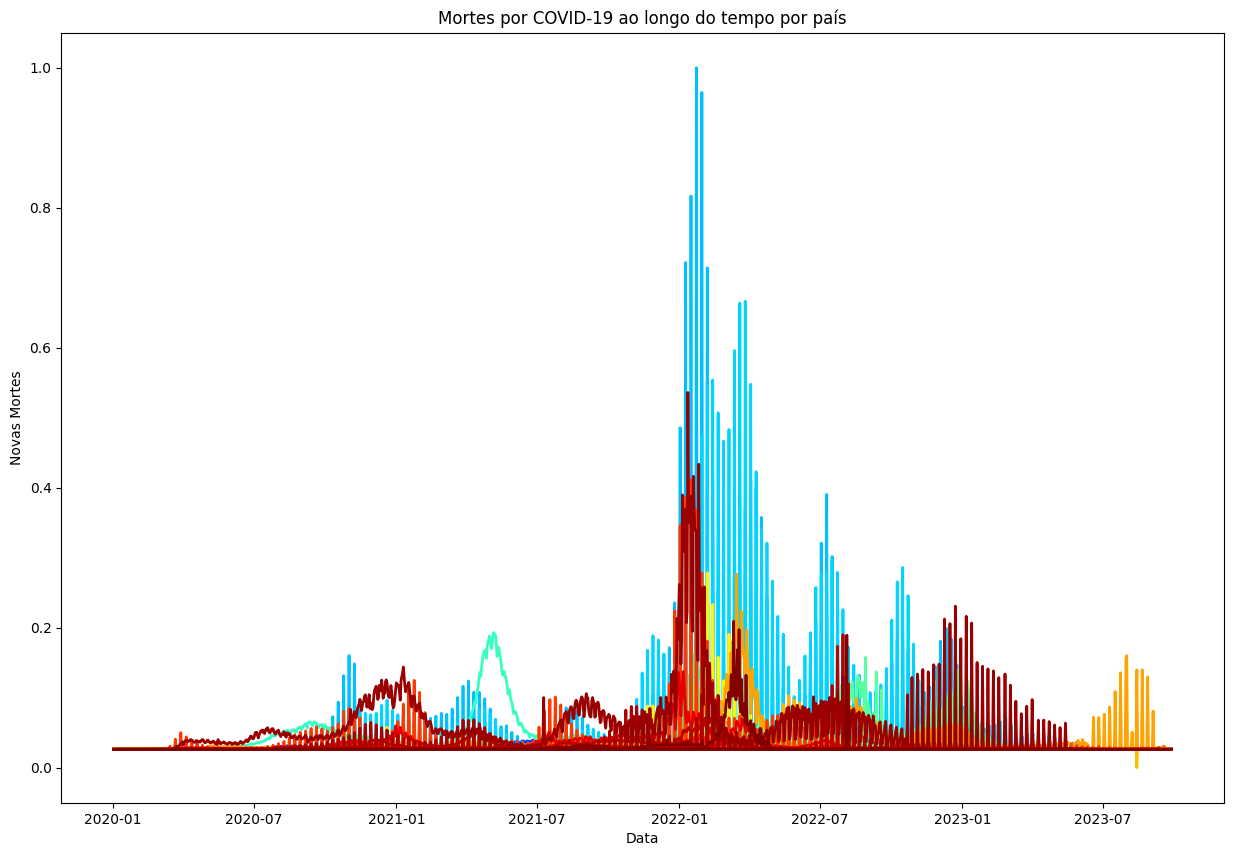

Maior valor na Coluna New_deaths:                            Country WHO_region  New_cases  Cumulative_cases  \
Country_code Date_reported                                                   
FR           2022-01-23     France       EURO    2417043          15955822   

                            New_deaths  Cumulative_deaths  season  \
Country_code Date_reported                                          
FR           2022-01-23            1.0             130121  winter   

                           Abbreviation  Population Urban_population  \
Country_code Date_reported                                             
FR           2022-01-23              FR    67059887       54,123,364   

                            Physicians_per_thousand  Relative_New_deaths  
Country_code Date_reported                                                
FR           2022-01-23                        3.27             0.000004  
Segundo maior valor na Coluna New_deaths:                            Country WHO_

In [16]:
plot_country_graph(data)

# Mariores valores
higher_value = data['New_deaths'].max()
higher_value_row = data[data["New_deaths"] == higher_value]
print("Maior valor na Coluna New_deaths:", higher_value_row)

second_higher_value = data['New_deaths'].nlargest(2).iloc[-1]
second_higher_value_row = data[data["New_deaths"] == second_higher_value]
print("Segundo maior valor na Coluna New_deaths:", second_higher_value_row)

third_higher_value = data['New_deaths'].nlargest(3).iloc[-1]
third_higher_value_row = data[data["New_deaths"] == third_higher_value]
print("Terceiro maior valor na Coluna New_deaths:", third_higher_value_row)


# Menores valores:
index_lowest_value = data['New_deaths'].idxmin()

# Acessando a linha usando o índice encontrado
lowest_value_tow = data.loc[index_lowest_value]
print("Menor valor na Coluna New_deaths:", lowest_value_tow)


<function matplotlib.pyplot.show(close=None, block=None)>

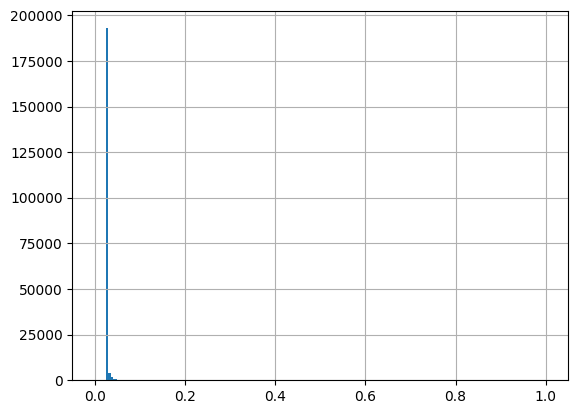

In [17]:
# Histograma dos New_deaths
data['New_deaths'].hist(bins=200)
plt.show

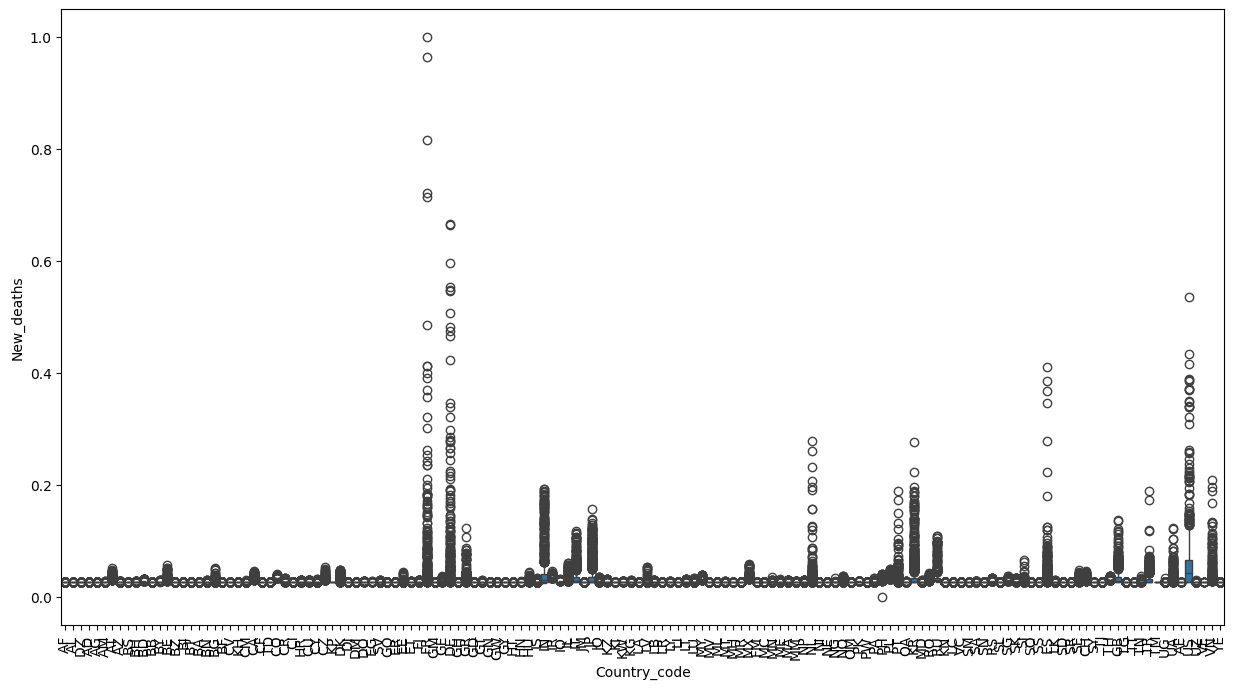

In [18]:
# BoxPlot dos novos casos separado por países
plt.figure(figsize=(15, 8))  # Ajuste o tamanho conforme necessário
sns.boxplot(x='Country_code', y='New_deaths', data=data)
plt.xticks(rotation=90)  # Rótulos rotacionados para melhor visualização
plt.show()

In [11]:
# Visualizar a concentração de dados zeros
print(data['New_deaths'].value_counts())

New_deaths
0.009256    86485
0.009256     3709
0.009256     2597
0.009256     2081
0.009256     1791
            ...  
0.011988        1
0.011063        1
0.012195        1
0.012554        1
0.009680        1
Name: count, Length: 16229, dtype: int64


In [12]:
# Visualizar a distruibuição de amostras por estação
data['season'].value_counts()

season
summer    56024
spring    54832
winter    51852
autumn    40528
Name: count, dtype: int64

In [19]:
# Transformando dados em formato de painel
panel_data = data

# Convertendo 'season' em variáveis dummy
panel_data['season'] = panel_data['season'].astype('category')
dummies = pd.get_dummies(panel_data['season'])

# Agora, junta as variáveis dummy de volta ao DataFrame
panel_data = pd.concat([panel_data, dummies], axis=1)

# Criando dataframe auxliar com variáveis dummy
aux = panel_data[['New_deaths', 'autumn', 'spring', 'summer']].copy()
aux['spring'] = aux['spring'].astype(int)
aux['autumn'] = aux['autumn'].astype(int)
aux['summer'] = aux['summer'].astype(int)
# aux['winter'] = aux['winter'].astype(int)


aux


New_deaths  autumn  spring  summer
Country_code Date_reported                                    
AF           2020-01-03       0.026219       0       0       0
             2020-01-04       0.026219       0       0       0
             2020-01-05       0.026219       0       0       0
             2020-01-06       0.026219       0       0       0
             2020-01-07       0.026219       0       0       0
...                                ...     ...     ...     ...
YE           2023-09-23       0.026219       1       0       0
             2023-09-24       0.026219       1       0       0
             2023-09-25       0.026219       1       0       0
             2023-09-26       0.026219       1       0       0
             2023-09-27       0.026219       1       0       0

[201872 rows x 4 columns]

In [20]:
# # Modelo de Efeitos Fixos
# fe_model = PanelOLS.from_formula('New_deaths ~ 1 + Population + Urban_population + Physicians_per_thousand + EntityEffects', aux, check_rank=False)
fe_model = PanelOLS.from_formula('New_deaths ~ 1 + autumn + summer + spring + EntityEffects', aux)
fe_results = fe_model.fit()
print(fe_results)

# # Modelo de Efeitos Aleatórios
# re_model = RandomEffects.from_formula('New_deaths ~ 1 +  autumn + summer + spring + EntityEffects', data=aux)
# re_results = re_model.fit()
# print(re_results)


                          PanelOLS Estimation Summary                           
Dep. Variable:             New_deaths   R-squared:                        0.0016
Estimator:                   PanelOLS   R-squared (Between):           4.441e-16
No. Observations:              201872   R-squared (Within):               0.0016
Date:                Wed, Nov 29 2023   R-squared (Overall):              0.0014
Time:                        17:33:28   Log-likelihood                 6.557e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      109.52
Entities:                         148   P-value                           0.0000
Avg Obs:                       1364.0   Distribution:                F(3,201721)
Min Obs:                       1364.0                                           
Max Obs:                       1364.0   F-statistic (robust):             109.52
                            

In [579]:
# Teste de Hausman, para decidir entre efeitos fixos e efeitos aleatórios
from scipy import stats

psi = fe_results.cov.iloc[1:,1:] - re_results.cov.iloc[1:,1:]
diff = fe_results.params[1:] - re_results.params[1:]
W = -diff.dot(np.linalg.inv(-psi)).dot(-diff)
dof = re_results.params.size - 1
pvalue = stats.chi2(dof).sf(W)
print("Hausman Test: chisq = {0}, df = {1}, p-value = {2}".format(W, dof, pvalue))

Hausman Test: chisq = -1.827000901490152, df = 3, p-value = 1.0


In [ ]:
# Agrupamento de dados, caso necessário
# Selecting the specified columns
selected_columns = ['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_deaths',
                    'Cumulative_cases', 'New_deaths', 'Cumulative_deaths', 'season', 
                    'Abbreviation', 'Population', 'Urban_population', 'Physicians per thousand']

# Grouping the data
grouped_data_selected_columns = data[selected_columns].set_index('Date_reported').groupby(['Country', 'Country_code']).resample('W').agg({
    'New_deaths': 'sum',
    'Cumulative_cases': 'sum',
    'New_deaths': 'sum',
    'Cumulative_deaths': 'sum',
    'WHO_region': 'last',
    'season': 'last',
    'Abbreviation': 'last',
    'Population': 'last',
    'Urban_population': 'last',
    'Physicians per thousand': 'last'
}).reset_index()